In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn.linear_model as lm
import pickle
from sklearn.externals import joblib

In [2]:
df=pd.read_csv("fuelcons.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


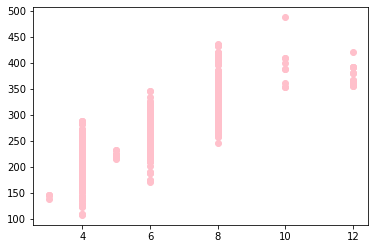

In [4]:
plt.scatter(df.CYLINDERS,df.CO2EMISSIONS,color="pink")

In [5]:
value=np.random.rand(len(df))<.8
train=df[value]
test=df[~value]

In [6]:
print(train)

      MODELYEAR   MAKE       MODEL    VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0          2014  ACURA         ILX         COMPACT         2.0          4   
1          2014  ACURA         ILX         COMPACT         2.4          4   
2          2014  ACURA  ILX HYBRID         COMPACT         1.5          4   
3          2014  ACURA     MDX 4WD     SUV - SMALL         3.5          6   
4          2014  ACURA     RDX AWD     SUV - SMALL         3.5          6   
...         ...    ...         ...             ...         ...        ...   
1062       2014  VOLVO    XC60 AWD     SUV - SMALL         3.0          6   
1063       2014  VOLVO    XC60 AWD     SUV - SMALL         3.2          6   
1064       2014  VOLVO    XC70 AWD     SUV - SMALL         3.0          6   
1065       2014  VOLVO    XC70 AWD     SUV - SMALL         3.2          6   
1066       2014  VOLVO    XC90 AWD  SUV - STANDARD         3.2          6   

     TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0 

In [7]:
print(test)

      MODELYEAR          MAKE                     MODEL    VEHICLECLASS  \
8          2014         ACURA                    TL AWD        MID-SIZE   
9          2014         ACURA                       TSX         COMPACT   
16         2014  ASTON MARTIN              V8 VANTAGE S      TWO-SEATER   
34         2014          AUDI                       A8L       FULL-SIZE   
38         2014          AUDI                        Q5     SUV - SMALL   
...         ...           ...                       ...             ...   
1043       2014    VOLKSWAGEN                    PASSAT        MID-SIZE   
1049       2014    VOLKSWAGEN   PASSAT TDI CLEAN DIESEL        MID-SIZE   
1051       2014    VOLKSWAGEN                    TIGUAN     SUV - SMALL   
1055       2014    VOLKSWAGEN  TOUAREG TDI CLEAN DIESEL  SUV - STANDARD   
1061       2014         VOLVO                      XC60     SUV - SMALL   

      ENGINESIZE  CYLINDERS TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  \
8            3.7        

In [8]:
regr=lm.LinearRegression()
train_x=np.asanyarray(train[["ENGINESIZE"]])
train_y=np.asanyarray(train[["CO2EMISSIONS"]])
regr.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
print(regr.coef_)

[[39.10233722]]


In [10]:
print(regr.intercept_)

[124.86884721]


In [11]:
#Saving the model

joblib.dump(regr,"fuel2.pkl")

['fuel2.pkl']

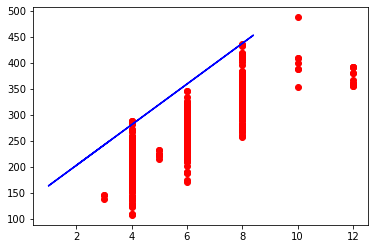

In [12]:
plt.scatter(train.CYLINDERS,train.CO2EMISSIONS,color='red')
plt.plot(train_x, regr.intercept_ + regr.coef_ * train_x,'-b')
plt.show()

In [13]:
test_x=np.asanyarray(test[["CYLINDERS"]])
test_y=np.asanyarray(test[["CO2EMISSIONS"]])
prediction=regr.predict(test_x)
print(prediction)

[[359.48287055]
 [281.27819611]
 [437.687545  ]
 [437.687545  ]
 [281.27819611]
 [359.48287055]
 [515.89221945]
 [437.687545  ]
 [359.48287055]
 [594.0968939 ]
 [281.27819611]
 [281.27819611]
 [359.48287055]
 [359.48287055]
 [359.48287055]
 [437.687545  ]
 [437.687545  ]
 [437.687545  ]
 [437.687545  ]
 [359.48287055]
 [281.27819611]
 [281.27819611]
 [281.27819611]
 [281.27819611]
 [281.27819611]
 [281.27819611]
 [281.27819611]
 [281.27819611]
 [359.48287055]
 [437.687545  ]
 [359.48287055]
 [437.687545  ]
 [437.687545  ]
 [281.27819611]
 [281.27819611]
 [437.687545  ]
 [437.687545  ]
 [437.687545  ]
 [437.687545  ]
 [281.27819611]
 [281.27819611]
 [359.48287055]
 [437.687545  ]
 [437.687545  ]
 [359.48287055]
 [281.27819611]
 [281.27819611]
 [437.687545  ]
 [359.48287055]
 [281.27819611]
 [359.48287055]
 [359.48287055]
 [359.48287055]
 [359.48287055]
 [281.27819611]
 [359.48287055]
 [281.27819611]
 [281.27819611]
 [437.687545  ]
 [437.687545  ]
 [281.27819611]
 [281.27819611]
 [359.48

In [14]:
predict_df=pd.read_csv("check.csv")
predict_df.head()

,CYLINDER,CO2EMISSIONS
0,5.8,0


In [15]:
predict_x=np.asanyarray(predict_df[["CYLINDER"]])
prediction=regr.predict(predict_x)
print(prediction)

[[351.66240311]]
